In [ ]:
!nvidia-smi

Fri Nov 20 07:16:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 185 (delta 5), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (185/185), 57.14 KiB | 317.00 KiB/s, done.
Resolving deltas: 100% (67/67), done.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT CHANGES: RAPIDS on Colab will be pegged to 0.14 Stable until further notice.
2. Default stable version is now 0.14.  Nightly will redirect to 0.14.
3. You can now declare your RAPIDSAI version as a CLI option and skip the user prompts (ex: '0.14' or '0.15', between 0.13 to 0.14, without the quotes): 
        "!bash rapidsai-csp-utils/colab/rapids-colab.sh <version/label>"
        Examples: '!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.14', or '!bash rapidsai-csp-utils/colab/rapids-colab.sh stable', or '!bash ra

## Code Demonstration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cudf
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Python cudf /1K.csv")
data.head()

,Unnamed: 0,SYMBOL,SERIES,Open,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [ ]:
# TEST 1 : LOADING TIMES 

In [ ]:
# A. PANDAS

In [ ]:
datasets = ['1K.csv','10K.csv','100K.csv','1M.csv']
pd_times = {}

for i in range(len(datasets)):
    if datasets[i] == '100K.csv' or datasets[i] == '1M.csv':
        t0 = time.time()
        pdf = pd.read_csv("/content/drive/MyDrive/Python cudf /" + datasets[i])
        t1 = time.time()
        elapsed_time = t1 - t0
        pd_times[datasets[i]]=elapsed_time
    else:
        elapsed_time = 0
        for j in range(100):
            t0 = time.time()
            pdf = pd.read_csv("/content/drive/MyDrive/Python cudf /" + datasets[i])
            t1 = time.time()
            elapsed_time = elapsed_time + (t1 - t0)
        pd_times[datasets[i]]=elapsed_time/100
        

print(pd_times)
pd_times = list(pd_times.values())


{'1K.csv': 0.004988090991973877, '10K.csv': 0.018236896991729735, '100K.csv': 0.15510988235473633, '1M.csv': 1.1948351860046387}


In [ ]:
# B. cuDF

In [ ]:
r_times = {}

for i in range(len(datasets)):
    if datasets[i] == '100K.csv' or datasets[i] == '1M.csv':
        t0 = time.time()
        rdf = cudf.read_csv("/content/drive/MyDrive/Python cudf /" + datasets[i])
        t1 = time.time()
        elapsed_time = t1 - t0
        r_times[datasets[i]] = elapsed_time
    else:
        elapsed_time = 0
        for j in range(100):
            t0 = time.time()
            rdf = cudf.read_csv("/content/drive/MyDrive/Python cudf /" + datasets[i])
            t1 = time.time()
            elapsed_time = elapsed_time + (t1 - t0)
        r_times[datasets[i]] = elapsed_time/100
        

print(r_times)
r_times = list(r_times.values())

{'1K.csv': 0.008040645122528077, '10K.csv': 0.009143357276916503, '100K.csv': 0.02373647689819336, '1M.csv': 0.14206147193908691}


Text(0, 0.5, 'Time in seconds')

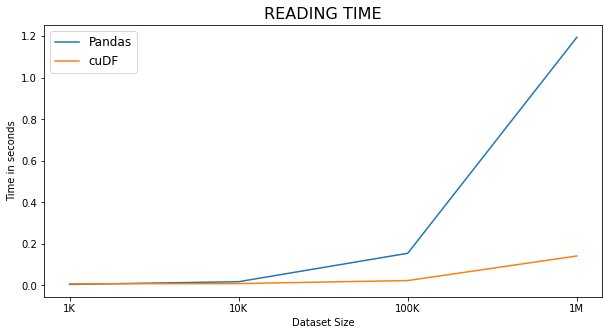

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4],pd_times, label='Pandas')
plt.plot([1,2,3,4],r_times, label='cuDF')
plt.xticks([1, 2, 3, 4], labels=['1K','10K','100K','1M'])
plt.legend(loc='best',fontsize=12)
plt.title('READING TIME', size=16)
plt.xlabel('Dataset Size')
plt.ylabel('Time in seconds')

In [ ]:
pdf1K = pd.read_csv('/content/drive/MyDrive/Python cudf /1K.csv')
pdf10K = pd.read_csv('/content/drive/MyDrive/Python cudf /10K.csv')
pdf100K = pd.read_csv('/content/drive/MyDrive/Python cudf /100K.csv')
pdf1M = pd.read_csv('/content/drive/MyDrive/Python cudf /1M.csv')

In [ ]:
rdf1K = cudf.read_csv('/content/drive/MyDrive/Python cudf /1K.csv')
rdf10K = cudf.read_csv('/content/drive/MyDrive/Python cudf /10K.csv')
rdf100K = cudf.read_csv('/content/drive/MyDrive/Python cudf /100K.csv')
rdf1M = cudf.read_csv('/content/drive/MyDrive/Python cudf /1M.csv')

In [ ]:
# TEST 2: MEAN COMPUTATION

In [ ]:
# A. PANDAS

In [ ]:
pd_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    pdf1K['Open'].mean()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/1000)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    pdf10K['Open'].mean()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/1000)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    pdf100K['Open'].mean()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/1000)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    pdf1M['Open'].mean()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/1000)
    
    
pd_times

[7.010388374328613e-05,
 5.487680435180664e-05,
 0.00019245266914367677,
 0.001290419816970825]

In [ ]:
#B. cuDF

In [ ]:
r_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    rdf1K['Open'].mean()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/1000)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    rdf10K['Open'].mean()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/1000)

    
    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    rdf100K['Open'].mean()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/1000)

    
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    rdf1M['Open'].mean()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/1000)
    
    
r_times

[0.0005440871715545654,
 0.0005607120990753174,
 0.0005522384643554687,
 0.0010670771598815917]

Text(0, 0.5, 'Time in seconds')

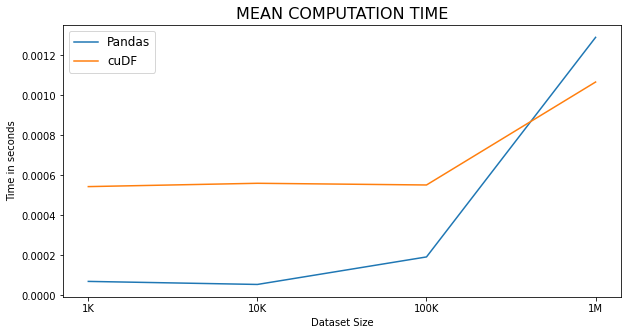

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4],pd_times, label='Pandas')
plt.plot([1,2,3,4],r_times, label='cuDF')
plt.xticks([1, 2, 3, 4], labels=['1K','10K','100K','1M'])
plt.legend(loc='best',fontsize=12)
plt.title('MEAN COMPUTATION TIME', size=16)
plt.xlabel('Dataset Size')
plt.ylabel('Time in seconds')

In [ ]:
# Test 3 : Computing Returns

In [ ]:
# A. PANDAS

In [ ]:
pd_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    pdf1K['ReturnOC'] = pdf1K['CLOSE'] / pdf1K['Open'] - 1
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    del pdf1K["ReturnOC"]
    
pd_times.append(elapsed_time/1000)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    pdf10K['ReturnOC'] = pdf10K['CLOSE'] / pdf10K['Open'] - 1
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    del pdf10K["ReturnOC"]
    
pd_times.append(elapsed_time/1000)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    pdf100K['ReturnOC'] = pdf100K['CLOSE'] / pdf100K['Open'] - 1
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    del pdf100K["ReturnOC"]
    
pd_times.append(elapsed_time/1000)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    pdf1M['ReturnOC'] = pdf1M['CLOSE'] / pdf1M['Open'] - 1
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    del pdf1M["ReturnOC"]
    
pd_times.append(elapsed_time/1000)
    
    
pd_times

[0.0007138957977294921,
 0.0007302522659301758,
 0.0016041603088378907,
 0.004892044305801392]

In [ ]:
# B. cuDF

In [ ]:
r_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    rdf1K['ReturnOC'] = rdf1K['CLOSE'] / rdf1K['Open'] - 1
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    del rdf1K["ReturnOC"]
    
r_times.append(elapsed_time/1000)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    rdf10K['ReturnOC'] = rdf10K['CLOSE'] / rdf10K['Open'] - 1
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    del rdf10K["ReturnOC"]
    
r_times.append(elapsed_time/1000)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    rdf100K['ReturnOC'] = rdf100K['CLOSE'] / rdf100K['Open'] - 1
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    del rdf100K["ReturnOC"]
    
r_times.append(elapsed_time/1000)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(1000):
    t0 = time.time()
    rdf1M['ReturnOC'] = rdf1M['CLOSE'] / rdf1M['Open'] - 1
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    del rdf1M["ReturnOC"]
    
r_times.append(elapsed_time/1000)
    
    
r_times

[0.0005874068737030029,
 0.0005800879001617432,
 0.0005847630500793457,
 0.0010099575519561769]

Text(0, 0.5, 'Time in seconds')

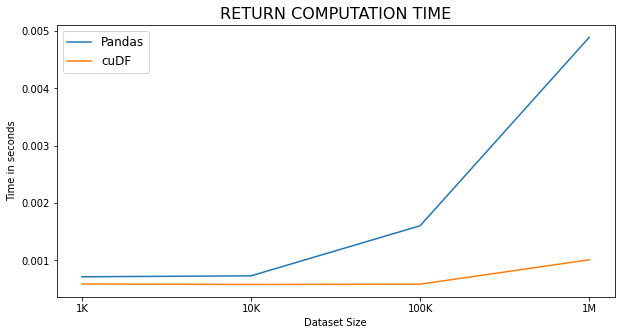

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4],pd_times, label='Pandas')
plt.plot([1,2,3,4],r_times, label='cuDF')
plt.xticks([1, 2, 3, 4], labels=['1K','10K','100K','1M'])
plt.legend(loc='best',fontsize=12)
plt.title('RETURN COMPUTATION TIME', size=16)
plt.xlabel('Dataset Size')
plt.ylabel('Time in seconds')

In [ ]:
# Test 4 : SLICING DATAFRAMES

In [ ]:
# A: PANDAS

In [ ]:
pd_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    dft = pdf1K[(pdf1K['Open'] > pdf1K['PREVCLOSE']) & (pdf1K['Open'] < pdf1K['CLOSE'])]
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    dft = pdf10K[(pdf10K['Open'] > pdf10K['PREVCLOSE']) & (pdf10K['Open'] < pdf10K['CLOSE'])]
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    dft = pdf100K[(pdf100K['Open'] > pdf100K['PREVCLOSE']) & (pdf100K['Open'] < pdf100K['CLOSE'])]
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    dft = pdf1M[(pdf1M['Open'] > pdf1M['PREVCLOSE']) & (pdf1M['Open'] < pdf1M['CLOSE'])]
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)
    
    
pd_times

[0.0010238909721374512,
 0.0009887385368347167,
 0.003186359405517578,
 0.023781039714813233]

In [ ]:
#B: cuDF

In [ ]:
r_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    dft = rdf1K[(rdf1K['Open'] > rdf1K['PREVCLOSE']) & (rdf1K['Open'] < rdf1K['CLOSE'])]
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    dft = rdf10K[(rdf10K['Open'] > rdf10K['PREVCLOSE']) & (rdf10K['Open'] < rdf10K['CLOSE'])]
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    dft = rdf100K[(rdf100K['Open'] > rdf100K['PREVCLOSE']) & (rdf100K['Open'] < rdf100K['CLOSE'])]
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    dft = rdf1M[(rdf1M['Open'] > rdf1M['PREVCLOSE']) & (rdf1M['Open'] < rdf1M['CLOSE'])]
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)
    
    
r_times

[0.003553416728973389,
 0.0035737848281860354,
 0.0036057496070861818,
 0.005651528835296631]

Text(0, 0.5, 'Time in seconds')

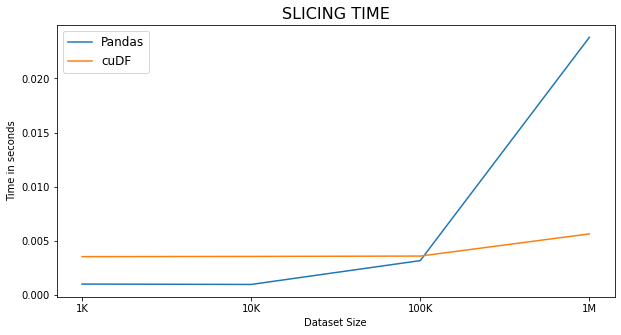

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4],pd_times, label='Pandas')
plt.plot([1,2,3,4],r_times, label='cuDF')
plt.xticks([1, 2, 3, 4], labels=['1K','10K','100K','1M'])
plt.legend(loc='best',fontsize=12)
plt.title('SLICING TIME', size=16)
plt.xlabel('Dataset Size')
plt.ylabel('Time in seconds')

In [ ]:
# Test 5 : Calculation of Unique values in a column 

In [ ]:
#Pandas

In [ ]:
pd_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    unique_values1K = pdf1K["SERIES"].value_counts()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    unique_values10K = pdf10K['SERIES'].value_counts()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    unique_values100K = pdf100K['SERIES'].value_counts()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    unique_values1M = pdf1M['SERIES'].value_counts()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)
    
    
pd_times

[0.000823376178741455,
 0.001548607349395752,
 0.008621413707733155,
 0.07510078668594361]

In [ ]:
#Cudf

In [ ]:
r_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    unique_values1K = rdf1K["SERIES"].unique()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    unique_values10K = rdf10K["SERIES"].unique()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    unique_values100K = rdf100K["SERIES"].unique()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    unique_values1M = rdf1M["SERIES"].unique()
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)
    
    
r_times

[0.0016188240051269532,
 0.0019567346572875975,
 0.002423279285430908,
 0.007360827922821045]

Text(0, 0.5, 'Time in seconds')

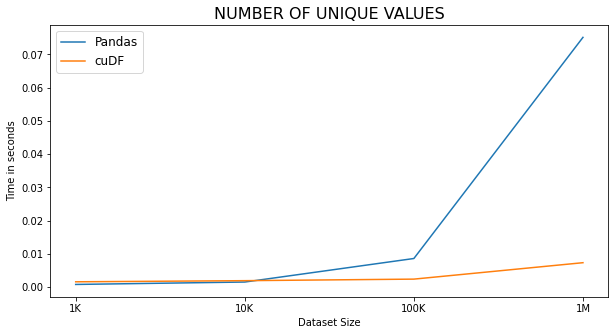

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4],pd_times, label='Pandas')
plt.plot([1,2,3,4],r_times, label='cuDF')
plt.xticks([1, 2, 3, 4], labels=['1K','10K','100K','1M'])
plt.legend(loc='best',fontsize=12)
plt.title('NUMBER OF UNIQUE VALUES', size=16)
plt.xlabel('Dataset Size')
plt.ylabel('Time in seconds')

In [ ]:
# Test 6: Fill NAN values with the mode of the Series

In [ ]:
#Pandas

In [ ]:
pd_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    pdf1K["SERIES"] = pdf1K["SERIES"].fillna(pdf1K["SERIES"].mode())
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    pdf10K['SERIES'] = pdf10K['SERIES'].fillna(pdf10K["SERIES"].mode())
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    pdf1K["SERIES"] = pdf100K['SERIES'].fillna(pdf100K["SERIES"].mode())
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    pdf1K["SERIES"] = pdf1M['SERIES'].fillna(pdf1M["SERIES"].mode())
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)
    
    
pd_times

[0.0008660626411437989,
 0.00192915678024292,
 0.013115670680999756,
 0.11399003505706787]

In [ ]:
#Cudf

In [ ]:
r_times = []



#DataFrame with 1 000 lines
elapsed_time = 0
for j in range(100):
    t0 = time.time()
    rdf1K["SERIES"] = rdf1K["SERIES"].astype(object).fillna(rdf1K["SERIES"].value_counts().index[0])
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    rdf10K["SERIES"] = rdf10K["SERIES"].fillna(rdf10K["SERIES"].value_counts().index[0])
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    rdf100K["SERIES"] = rdf100K["SERIES"].fillna(rdf100K["SERIES"].value_counts().index[0])
    #.mode() function is not implemented yet
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    rdf1M["SERIES"]= rdf1M["SERIES"].fillna(rdf1M["SERIES"].value_counts().index[0])
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/100)
    
    
r_times

[0.01492950201034546,
 0.014647562503814698,
 0.015058608055114745,
 0.01840125322341919]

Text(0, 0.5, 'Time in seconds')

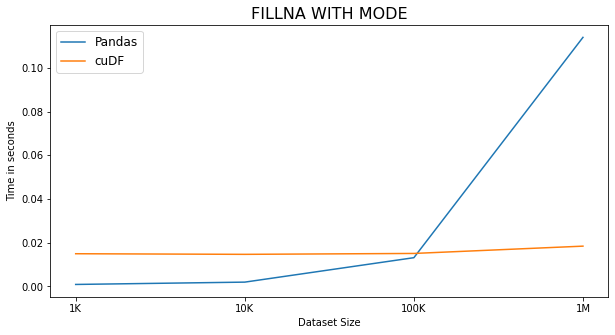

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4],pd_times, label='Pandas')
plt.plot([1,2,3,4],r_times, label='cuDF')
plt.xticks([1, 2, 3, 4], labels=['1K','10K','100K','1M'])
plt.legend(loc='best',fontsize=12)
plt.title('FILLNA WITH MODE', size=16)
plt.xlabel('Dataset Size')
plt.ylabel('Time in seconds')

In [ ]:
#Test 7:Label Encoder

In [ ]:
#Pandas and Scikit  

In [ ]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()



pd_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    pdf1K['SERIES'] = le.fit_transform(pdf1K['SERIES'].astype(str))
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    pdf10K['SERIES'] = le.fit_transform(pdf10K['SERIES'].astype(str))
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    pdf100K['SERIES'] = le.fit_transform(pdf100K['SERIES'].astype(str))
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(100):
    t0 = time.time()
    pdf1M['SERIES'] = le.fit_transform(pdf1M['SERIES'].astype(str))
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/100)
    
    
pd_times


[0.0010677504539489747,
 0.007924542427062989,
 0.07910123825073243,
 0.6803741407394409]

In [ ]:
#Cudf


In [ ]:
r_times = []



#DataFrame with 1 000 lines
elapsed_time = 0
for j in range(10):
    t0 = time.time()
    rdf1K["SERIES"] = rdf1K["SERIES"].label_encoding(cats=rdf1K["SERIES"].unique())
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/10)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    rdf10K["SERIES"] = rdf10K["SERIES"].label_encoding(cats=rdf10K["SERIES"].unique())
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/10)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    rdf100K["SERIES"] = rdf100K["SERIES"].label_encoding(cats=rdf100K["SERIES"].unique())
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/10)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    rdf1M["SERIES"]= rdf1M["SERIES"].label_encoding(cats=rdf1M["SERIES"].unique())
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/10)
    
    
r_times

[0.006113195419311523,
 0.00648651123046875,
 0.00756220817565918,
 0.01643812656402588]

Text(0, 0.5, 'Time in seconds')

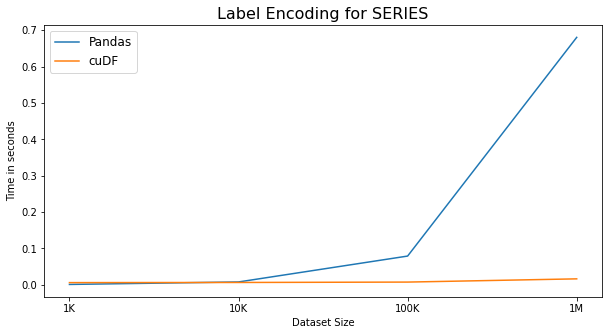

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4],pd_times, label='Pandas')
plt.plot([1,2,3,4],r_times, label='cuDF')
plt.xticks([1, 2, 3, 4], labels=['1K','10K','100K','1M'])
plt.legend(loc='best',fontsize=12)
plt.title('Label Encoding for SERIES', size=16)
plt.xlabel('Dataset Size')
plt.ylabel('Time in seconds')

In [ ]:
#Test 8: Matrix Multiplication

In [ ]:
data_matrix = pdf1K[["Open", 'CLOSE', 'HIGH', 'LOW']]
data_mul = data_matrix.T.dot(data_matrix)
data_mul

,Open,CLOSE,HIGH,LOW
Open,7.457795e+09,7.499404e+09,7.550896e+09,7.378196e+09
CLOSE,7.499404e+09,7.541623e+09,7.593321e+09,7.419438e+09
HIGH,7.550896e+09,7.593321e+09,7.645500e+09,7.470306e+09
LOW,7.378196e+09,7.419438e+09,7.470306e+09,7.299715e+09


In [ ]:
pd_times = []



#DataFrame with 1 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    data_matrix1 = pdf1K[["Open", 'CLOSE', 'HIGH', 'LOW']]
    data_mul1 = data_matrix1.mul(data_matrix1)
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/10)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    data_matrix10 = pdf10K[["Open", 'CLOSE', 'HIGH', 'LOW']]
    data_mul10 = data_matrix10.mul(data_matrix10)
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/10)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    data_matrix100 = pdf100K[["Open", 'CLOSE', 'HIGH', 'LOW']]
    data_mul100 = data_matrix100.mul(data_matrix100)
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/10)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    data_matrix1M = pdf1M[["Open", 'CLOSE', 'HIGH', 'LOW']]
    data_mul1M = data_matrix1M.mul(data_matrix1M)
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
pd_times.append(elapsed_time/10)
    
    
pd_times

[0.0008264303207397461,
 0.001129913330078125,
 0.002606320381164551,
 0.013277721405029298]

In [ ]:
#Cudf

In [ ]:
r_times = []



#DataFrame with 1 000 lines
elapsed_time = 0
for j in range(10):
    t0 = time.time()
    data_matrix1 = rdf1K[["Open", 'CLOSE', 'HIGH', 'LOW']]
    data_mul1 = data_matrix1.mul(data_matrix1)
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/10)

    
    
#DataFrame with 10 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    data_matrix10 = rdf10K[["Open", 'CLOSE', 'HIGH', 'LOW']]
    data_mul10 = data_matrix10.mul(data_matrix10)
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/10)


    
#DataFrame with 100 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    data_matrix100 = rdf100K[["Open", 'CLOSE', 'HIGH', 'LOW']]
    data_mul100 = data_matrix100.mul(data_matrix100)
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/10)

  
    
#DataFrame with 1 000 000 lines
elapsed_time = 0

for j in range(10):
    t0 = time.time()
    data_matrix1M = rdf1M[["Open", 'CLOSE', 'HIGH', 'LOW']]
    data_mul1M = data_matrix1M.mul(data_matrix1M)
    t1 = time.time()
    elapsed_time = elapsed_time + (t1 - t0)
    
r_times.append(elapsed_time/10)
    
    
r_times

[0.0020935773849487306,
 0.0015236854553222657,
 0.001528024673461914,
 0.003165721893310547]

Text(0, 0.5, 'Time in seconds')

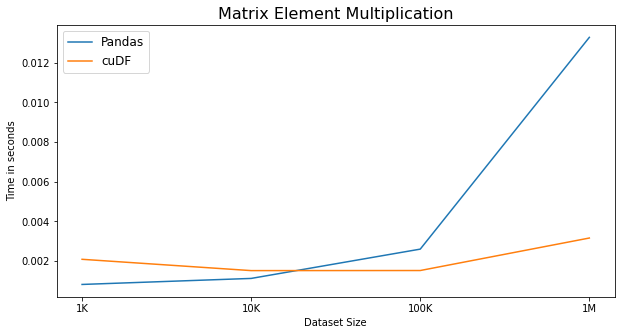

In [ ]:
plt.figure(figsize=(10,5))
plt.plot([1,2,3,4],pd_times, label='Pandas')
plt.plot([1,2,3,4],r_times, label='cuDF')
plt.xticks([1, 2, 3, 4], labels=['1K','10K','100K','1M'])
plt.legend(loc='best',fontsize=12)
plt.title('Matrix Element Multiplication', size=16)
plt.xlabel('Dataset Size')
plt.ylabel('Time in seconds')